This exercise is prepared for the **Advanced GIS Spatial Big Data** lecture offered in spring 2023 by Moritz Neun (Zürich) in collaboration with the Chair of Geoinformation Engineering (Institute of Cartography and Geoinformation, ETH Zürich).

Date updated: 2023-02-15

Instructor: Dr. Moritz Neun

Materials are prepared by Moritz Neun using previous materials by Dr. Yanan Xin, Henry Martin, and Jannik Hamper.


# Lab 2-2: K-Means Clustering

## A Simple Introduction
Clustering describes a set of problems where the goal is to automatically identify groups from a set of observations (data). These groups are called clusters and can be described by the following general definition: "Observation from the same cluster are more similar than observations from different clusters." 

A more formal definition of clustering is given by the K-Means problem. Given $n$ data points $x_i$, that have to be devided into $k$ clusters, each described by a cluster center $\mu_j$ which is the mean of all data points that belong to the cluster $j$. Find the cluster centers that minimize the following loss function: 

$$ J = \sum_{j=1}^{k} \sum_{x_i \in S_{j}} {\| x_i - \mu_j \|^2}$$
where $S_j$ is the set of all data points that are mapped to the cluster $j$ with cluster center $\mu_j$.

Finding an optimal solution for the k-means problem is np-hard, therefore there are several algorithms that find _good_ approximate (locally optimal) solutions. The most well-known algorithm is the _Loyds algorithm_ or _the k-means algorithm_.

After the initialization (e.g., randomly choose cluster center among the data points), this algorithm consists of only two steps: 
- __Assigment:__
Assign every point to the closest cluster center (centroid).
- __Update:__
Calculate new centroids as the average position of all points assigned to a cluster.



### Generate example data
We will now try our own implementation of the k-means algorithm.
At first we generate some artificial training data. The data will consist of two features (e.g., x-y coordinates). 

[[ -5.3198574    0.75249082]
 [ -5.98487648   0.48460018]
 [-11.22445972  -7.9716744 ]
 [ -4.56730382  -0.97897324]
 [ -3.30511661   0.02946152]
 [  1.53694847   0.81562926]
 [ -9.91246995  -5.15107857]
 [-12.02286529  -3.90285899]
 [ -7.48269121  -5.94732589]
 [  2.82413      3.85744585]]


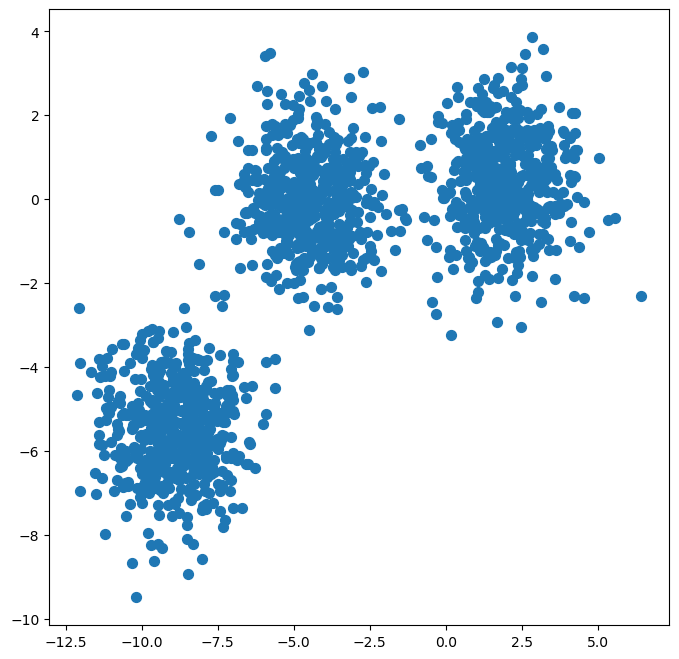

In [1]:
import json
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from itertools import groupby

from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, n_features=2, random_state=random_state, cluster_std=1.2)

print(X[0:10,:])
# Save X for later use
with open('k-means-sample-data.json', 'w') as f:
    json.dump(X.tolist(), f)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], s=50)

### Step 1: Initialize
The first step of the k-means algorithm is to choose an initial set of clustering centers. Here we implement this in a very simple fashion, we simply choose K number of random data points as the initial centers of the K clusters.

In [2]:
def init_centroids(k, X):
    """Choose random data points as initial centers for k-means
    
    k = number of clusters
    X = data [numpy array]
    
    return: 
    centroids [a list of tuple]: A list of tuple, each tuple is the coordinates of the 
                       cluster centroids"""
    
    n_points = len(X)
    rand = random.sample(range(n_points), k)
    centroids = [tuple(i) for i in X[rand,:]] # for each pair of x, y coordinates, convert it to tuple format
    
    return centroids

In [3]:
print(init_centroids(4,X))

[(-9.543790802995067, -5.3369154172855815), (-10.637645386717075, -6.3535066875768385), (-8.357911749202916, -5.2613186274194), (-9.871682698041093, -5.603641311407043)]


### Step 2: Assign points to clusters
The assign step _assigns_ every data point to the closest cluster center. In the following we create a function that does this.

In [30]:
def calc_dist(a,b):
    """Calculate euclidean distance between a data point and a cluster center"""
    # TODO: Implement computation of euclidean distance and return it. (1 line)
    dist = ??
    return dist

def assign_to_clusters(k, X, centroids):
    """Assign data points to the closest cluster
    k [] = number of clusters
    X = data
    centroids [list of tuples] = cluster centers
    
    Returns
    -------
    clusters: dictionary
        has the centroids (coordinates) as key and all assigned points (via index) as values.
    mapping : numpy array
        mapping of size nx1, assigns each observation to 1 cluster (enumerated from 0:k).
    """
    clusters = {}
    mapping = []
    for centroid in centroids:
        clusters[centroid] = []
    # for each data point
    for i in range(len(X)):
        point_dists = {}
        for centroid in centroids:
            # TODO: Calculate distance to each centroid (1 line)
            dist = ??
            point_dists[dist] = centroid
        closest_centroid = point_dists.get(min(point_dists)) 
        # TODO: populate the clusters dictionary (1 line)
        ??
        # cluster assignment for each point. mapping is used for plotting
        mapping.append(centroids.index(closest_centroid))
    return clusters, mapping

### Update centroids

In [24]:
def calc_new_centroids(clusters, X):
    """Calculate the new centroids as the mean of all points that are assigned to a cluster.
    clusters: dictionary
        has the centroids (coordinates) as key and all assigned points (via index) as values.
    X: numpy array
        the input data
    """
    new_centroids = []
    #TODO: compute new centroids (1 line)
    for cluster, members in clusters.items():
        new_centroid = ??
        new_centroids.append(tuple(new_centroid))
    return new_centroids

### Plotting function

In [31]:
%matplotlib inline
import time
import pylab as pl
from IPython import display

def plot_kmeans(title=""):
    plt.cla()
    plt.scatter(X[:, 0], X[:, 1], s=50, c=mapping)
    plt.scatter(*zip(*centroids), s=500, c=range(k), marker='^',
            edgecolors='k', linewidth=5)
    plt.title(title)
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(1)

### Testing K-Means

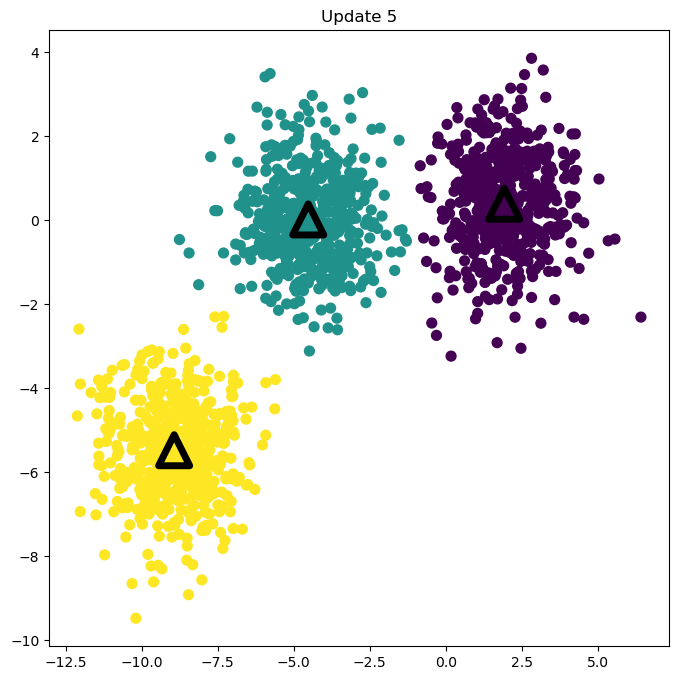

In [32]:
k = 3 # Number of clusters
steps = 10 # Number of steps to run k-means
plt.figure(figsize=(8, 8))

# initialize
# centroids = init_centroids(k,X)
centroids = [tuple(X[i,:]) for i in range(k)]

mapping = np.zeros((len(X))) # the initialization of the mapping is only for colors of the plot

plot_kmeans(title="Init")

for i in range(steps):
    old_centroids = centroids
    clusters, mapping = assign_to_clusters(k, X, centroids)
    plot_kmeans(title=f"Assign {i}")
    centroids = calc_new_centroids(clusters, X)
    plot_kmeans(title=f"Update {i}")
    # early stopping
    if old_centroids == centroids:
        break
plt.close()

# (1) Applying MapReduce to K-Means

To speed up computations, we can execute K-Means in a parallelized way by employing the MapReduce framework. It consists of a map function (mapper) and a reduce function (reducer). 
The map function executes the first intermediate steps of the total computation and emits for every execution a (key, value) pair. After that, these pairs are grouped by key. 
The reducer takes in the groups and combines them to an output.

In our case, the mapper takes in the points and emits the pair (assigned_cluster_index, point).
The reducer takes in all points assigned to the same cluster and computes the new cluster centroid.

You can find more explanation here:
https://www.coursera.org/lecture/ml-clustering-and-retrieval/mapreduce-for-k-means-EhCYk

In this exercise, we will first explain the concept using a simple word counting example and will then proceed to implementing the K-Means clustering using MapReduce.

### Example of MapReduce - Word Counting

In this example, we will use MapReduce to count the number of occurences for each word in a list of words.

### Step 1: Mapping

The mapping step here includes processing each word and emitting itself as the key and one as the value.

In [69]:
words = ['Deer', 'Bear', 'River', 'Car', 'Car', 'River', 'Deer', 'Car', 'Bear']

def mapper(x):
    return (x, 1)

map_result = list(map(mapper, words))

print(map_result)

[('Deer', 1), ('Bear', 1), ('River', 1), ('Car', 1), ('Car', 1), ('River', 1), ('Deer', 1), ('Car', 1), ('Bear', 1)]


### Step 2: Shuffling

In this step, we group the (key, value) pairs. This is also called shuffling.

In [79]:
key_func = lambda x: x[0]

for key, group in groupby(map_result, key_func):
    print(list(group))

[('Bear', 1), ('Bear', 1)]
[('Car', 1), ('Car', 1), ('Car', 1)]
[('Deer', 1), ('Deer', 1)]
[('River', 1), ('River', 1)]


It seems that using the groupy function did not group all paris that have the same key. The reason is that it only groups adjacent pairs with the same key. To get all pairs with the same key, we have to sort the list of (key, value) pairs first.

In [ ]:
sorted_map = sorted(map_result)
for key, group in groupby(sorted_map, key_func):
    print(list(group))

### Step 3: Reducing

In this last step, we implement the reduce step. It consists of adding up the occurences for each key/word.

In [80]:
def reducer(list_of_values):
    return sum(list_of_values)

for key, group in groupby(sorted_map, key_func):
    list_of_values = [item[1] for item in group]
    print(list_of_values)
    count = reducer(list_of_values)
    print(f"The word {key} appreas {count} times in the sentence")
    print("")

[1, 1]
The word Bear appreas 2 times in the sentence

[1, 1, 1]
The word Car appreas 3 times in the sentence

[1, 1]
The word Deer appreas 2 times in the sentence

[1, 1]
The word River appreas 2 times in the sentence



### Now Let's use MapReduce for K-Means!

### Step 1: Mapping

First, you have to create a mapper that maps each point to its closest cluster centroid.

In [12]:
centroids = init_centroids(3,X)

def mapper(point):
    #This is the classification step. It classifies each point to its closest cluster.
    cluster_centers = centroids
    candidate_cluster = None
    candidate_distance = None
    #Compute the correponding cluster
    for i in range(len(cluster_centers)):
        current_cluster_center = cluster_centers[i]
        #TODO: calculate distance between current cluster center and the point (1 line)
        current_distance = ??
        if candidate_cluster is None:
            candidate_cluster = i
            candidate_distance = current_distance
        else:
            if current_distance < candidate_distance:
                candidate_cluster = i
                candidate_distance = current_distance
    return_value = (candidate_cluster, point)
    return return_value

In [13]:
# use the mapper to assign each point a cluster
map_result = list(map(mapper, X))
# print the first ten results
print(map_result[1:10])

# mapping for plotting function, cluster membership assignment
mapping = [pnt_member[0] for pnt_member in map_result]
print(mapping[1:10])

[(2, array([-5.98487648,  0.48460018])), (0, array([-11.22445972,  -7.9716744 ])), (2, array([-4.56730382, -0.97897324])), (2, array([-3.30511661,  0.02946152])), (1, array([1.53694847, 0.81562926])), (0, array([-9.91246995, -5.15107857])), (0, array([-12.02286529,  -3.90285899])), (0, array([-7.48269121, -5.94732589])), (1, array([2.82413   , 3.85744585]))]
[2, 0, 2, 2, 1, 0, 0, 0, 1]


### Step 2: Shuffling

In most frameworks, this is done automatically. 

In [14]:
sorted_map = sorted(map_result, key=lambda kv: kv[0])

key_func = lambda x: x[0]
for key, group in groupby(sorted_map, key_func):
    print(list(group)[1:10]) # print the first 10 points in each cluster

[(0, array([-9.91246995, -5.15107857])), (0, array([-12.02286529,  -3.90285899])), (0, array([-7.48269121, -5.94732589])), (0, array([-8.47712323, -4.94988873])), (0, array([-8.79120937, -4.40255473])), (0, array([-8.88236143, -5.30044226])), (0, array([-6.65292422, -4.4693268 ])), (0, array([-9.35977621, -6.23946552])), (0, array([-9.00210872, -4.66657046]))]
[(1, array([2.82413   , 3.85744585])), (1, array([ 5.34824487, -0.49034554])), (1, array([ 0.90559963, -0.40102324])), (1, array([2.20408584, 1.24315637])), (1, array([3.01468858, 2.02684643])), (1, array([ 0.96723553, -1.10551924])), (1, array([ 2.27568619, -0.2714628 ])), (1, array([ 3.38744631, -1.22033738])), (1, array([ 1.65436236, -0.9429415 ]))]
[(2, array([-5.98487648,  0.48460018])), (2, array([-4.56730382, -0.97897324])), (2, array([-3.30511661,  0.02946152])), (2, array([-2.12791606, -1.71968035])), (2, array([-3.61012888, -0.07896603])), (2, array([-5.08226405,  0.2621864 ])), (2, array([-3.93886827, -0.36343385])), (

### Step 3: Reducing

The reducing step computes the new cluster centers.

In [15]:
def reducer(j, list_of_points):
    # initiate the sum of coordinates and count values
    sum_coord = [0,0]
    count = 0
    #TODO: Compute center (3 lines)
    for i in range(len(list_of_points)):
        ??
        ??
    center = ??
    return (j, center)

In [16]:
new_cluster_centers = []

for key, group in groupby(sorted_map, key_func):
    #TODO: get the list of point coordinates for each group (1 line)
    list_of_values = ??
    new_center = reducer(key, list_of_values)
    new_cluster_centers.append(tuple(new_center[1]))
#     print(f"centroid {key} is computed as {new_center}")

print(centroids)
print(new_cluster_centers)

[(-7.888289731995156, -4.4388783592356), (3.163988926147853, -0.5199772779416976), (-5.782109132130703, 0.04475247455948456)]
[(-8.936972134435962, -5.478716915595016), (1.9198928113341962, 0.39010463270629764), (-4.5301903198590745, 0.019876988686990334)]


### Sanity Check: plotting of old vs new centers

We check visually if results have improved.

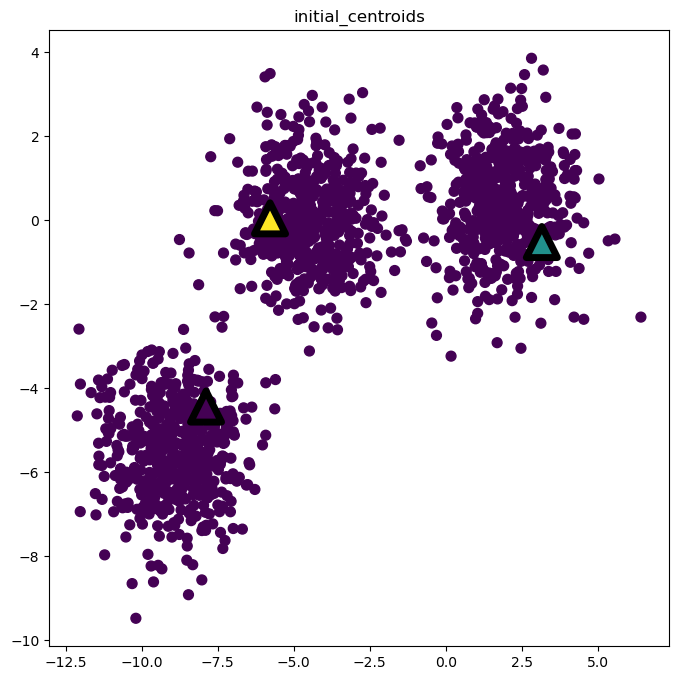

In [17]:
plt.figure(figsize=(8, 8))

centroids = centroids
mapping = np.zeros((len(X)))

plot_kmeans(title="initial_centroids")
plt.close()

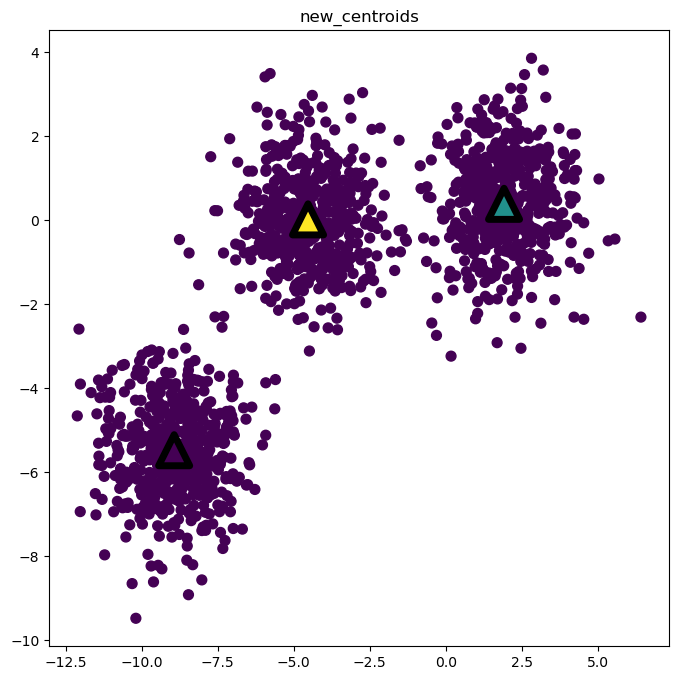

In [18]:
plt.figure(figsize=(8, 8))

centroids = new_cluster_centers
mapping = np.zeros((len(X)))
plot_kmeans(title="new_centroids")
plt.close()

### Step 4: Iterative Process of MapReduce for K-Means

Now we combine the previous three steps into an iterative process for K-Means.

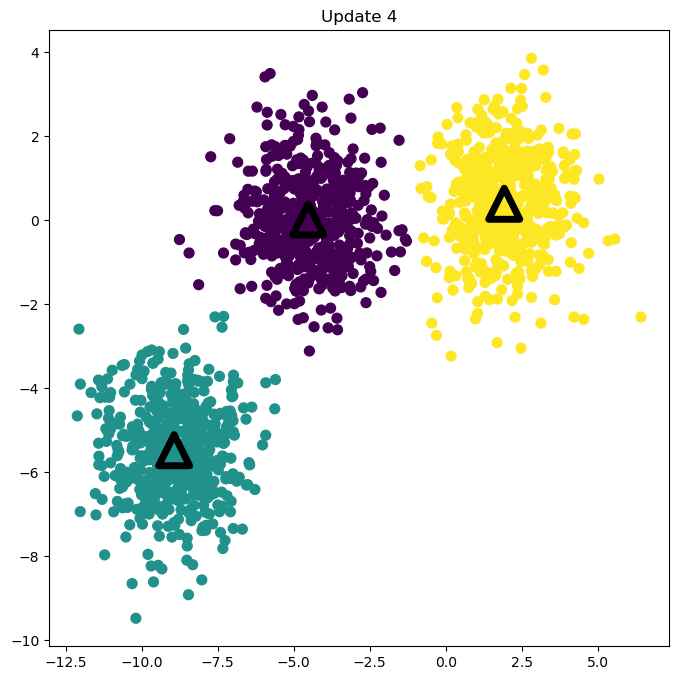

In [20]:
k = 3 # Number of clusters
steps = 10 # Number of steps to run k-means
plt.figure(figsize=(8, 8))

# initialize
centroids = init_centroids(k,X)
mapping = np.zeros((len(X))) # initialization with zeros only needed for colors in the plot

plot_kmeans(title="Init")

for i in range(steps):
    # Step 1: mapping
    old_centroids = centroids
    # TODO: implement the mapper (1 line)
    map_result = ??
    # Generate the mapping of points for plotting
    mapping = [pnt_member[0] for pnt_member in map_result]
    plot_kmeans(title="Assign " + str(i))
    
    # Step 2: shuffling
    sorted_map = sorted(map_result, key=lambda kv: kv[0])
    
    # Step 3: reducing
    new_cluster_centers = []
    key_func = lambda x: x[0]
    # TODO: implement the reducer (2 lines)
    for key, group in groupby(sorted_map, key_func):
        list_of_values = ??
        new_center = ??
        new_cluster_centers.append(tuple(new_center[1]))
    centroids = new_cluster_centers
    plot_kmeans(title="Update " + str(i))
    
    # early stopping
    if centroids == old_centroids:
        break
plt.close()

So far, we have structured our K-Means problem into parallelizable tasks using the MapReduce framework. To actually improve the computational speed, we need to assign the parallelizable tasks (mapper and reducer in our example) to different machines/processors/workers. This can be done by utilizing packages that support parallel computation, such as multiprocessing (https://docs.python.org/3/library/multiprocessing.html). Most big data frameworks also support this parallelization process through their high-level APIs. If you are eager to learn more, check out for example
* K-Means with MapReduce on Spark: https://github.com/seraogianluca/k-means-mapreduce/blob/master/doc/spark.md
* K-Means with Dask: https://ml.dask.org/modules/generated/dask_ml.cluster.KMeans.html

# (2) Parallelizing K-Means using Dask

We use exactly the same data used above which therefore was persisted in a file `k-means-sample-data.json`.

The Dask-ML library provides a ready-made implementation of parallel K-Means clustering, for more info see https://ml.dask.org/modules/generated/dask_ml.cluster.KMeans.html

We are launching a local dask client similar to the first exercises in lab 2-1 so you can check the computations being exectued through the dashboard at http://127.0.0.1:8987/status

In [37]:
import json
import numpy as np
import matplotlib.pyplot as plt
import dask
import dask.dataframe as dd
from dask.distributed import Client
import dask_ml.cluster
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

local_client = Client(n_workers=4, threads_per_worker=2, processes=True,
                      memory_limit='8GB', local_directory='/tmp',
                      scheduler_port=8986, dashboard_address='localhost:8987')
local_client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8987/status,
Dashboard: http://127.0.0.1:8987/status,Workers: 4
Total threads: 8,Total memory: 29.80 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:8986,Workers: 4
Dashboard: http://127.0.0.1:8987/status,Total threads: 8
Started: Just now,Total memory: 29.80 GiB
Comm: tcp://127.0.0.1:63327,Total threads: 2
Dashboard: http://127.0.0.1:63333/status,Memory: 7.45 GiB
Nanny: tcp://127.0.0.1:63318,


[[ -5.3198574    0.75249082]
 [ -5.98487648   0.48460018]
 [-11.22445972  -7.9716744 ]
 [ -4.56730382  -0.97897324]
 [ -3.30511661   0.02946152]]


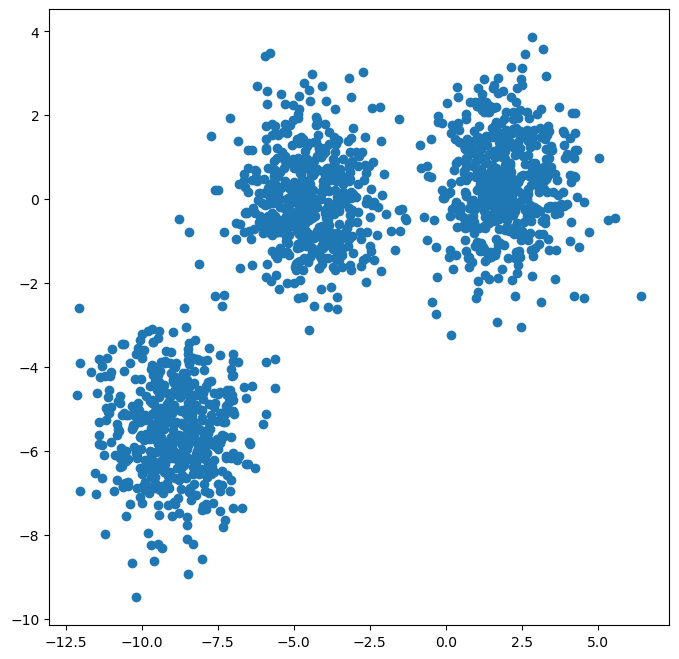

In [38]:
with open('k-means-sample-data.json', 'r') as f:
    X = json.load(f)
X = np.array(X)
print(X[:5])
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1])

Before you run the km.fit(X) statement open the Dask dashboard http://127.0.0.1:8987/graph ... this will allow you to see the actual parallelized plan Dask used to compute the clusters, this should look similar to
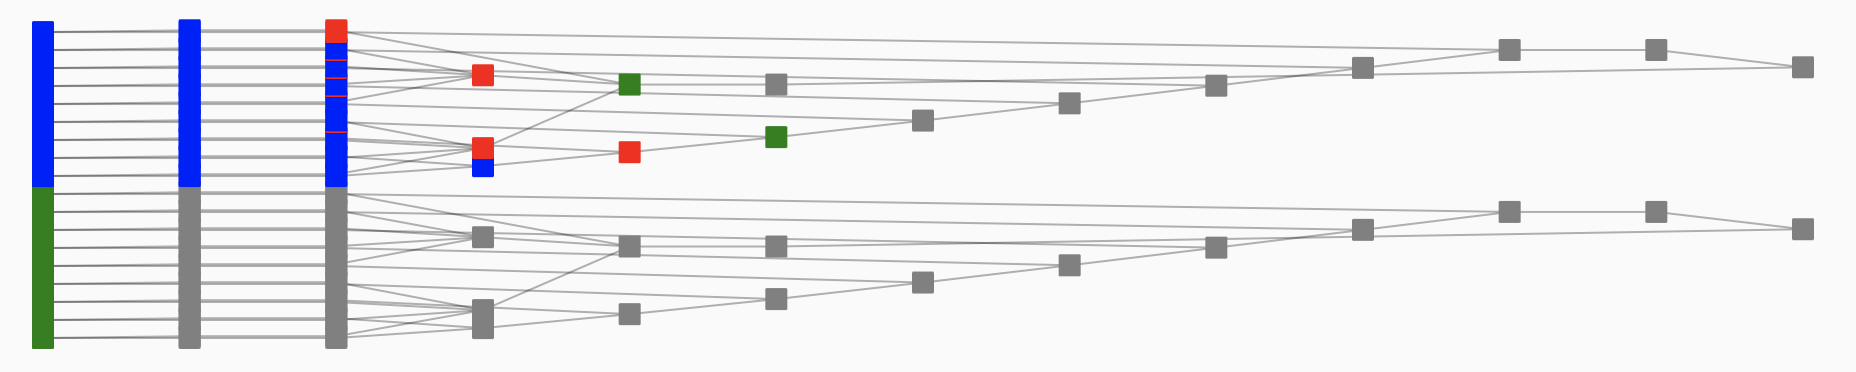
Be aware that the graph visualization will disappear when the computation finished.

In [39]:
km = dask_ml.cluster.KMeans(n_clusters=3, init_max_iter=2,
                            oversampling_factor=10)
km.fit(X)

/usr/local/Caskroom/miniconda/base/envs/BIGGIS23/lib/python3.9/site-packages/dask/base.py:1373: UserWarning: Running on a single-machine scheduler when a distributed client is active might lead to unexpected results.
  warnings.warn(


KMeans(init_max_iter=2, n_clusters=3, oversampling_factor=10)

The `fit` call did iteratively refine the cluster centers and assignments and we can now inspect them and see that they match the results of the MR-based clustering above.

In [40]:
km.cluster_centers_

array([[-8.93697213, -5.47871692],
       [ 1.92635684,  0.39189253],
       [-4.52374119,  0.0188444 ]])

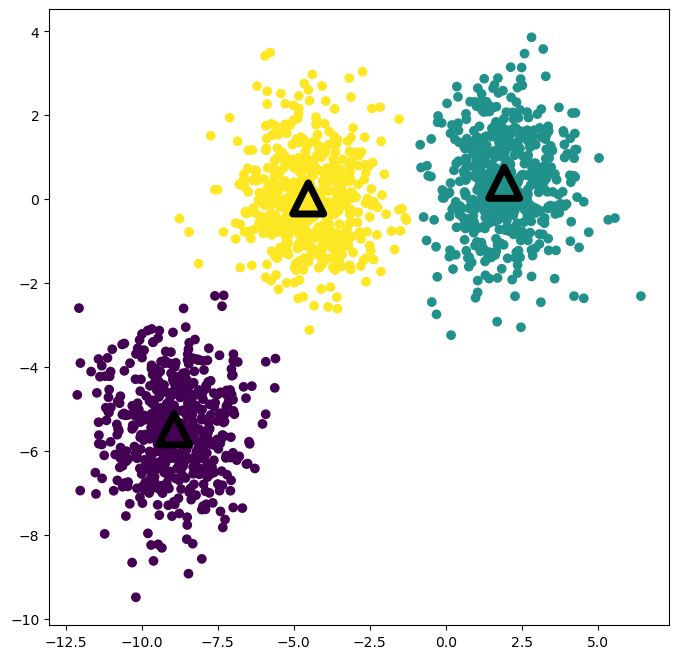

In [53]:
plt.figure(figsize=(8, 8))
plt.cla()
plt.scatter(X[:, 0], X[:, 1], c=km.labels_)
plt.scatter(*zip(*km.cluster_centers_), s=500, c=range(k), marker='^',
            edgecolors='k', linewidth=5)